<a href="https://colab.research.google.com/github/yashsinghkvojhar/DSML-Kitty-Flask/blob/main/Axion_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Guidelines –
1. Exploratory Data Analysis (Using python)
a. To understand data types, volume and characteristic per column. Identify and
solve for missing values, duplicated and other inconsistencies found.

b. Identify critical columns that looks insightful for stakeholders and provide a
summary of key statistical analysis along with distribution/visualizations for
critical columns identified.

2. Text Mining (Using NLP/open source LLM based)
a. Transform unstructured data into Structure format –
i. To identify free text columns given in raw data.
ii. Use text mining techniques to extract meaningful tags from the free text
fields. (Refer to few examples of entities (but not limited to) given in excel
file)

b. Categories “type of issues” (e.g. component failure, electrical issue etc.) based
upon observation/grouping of mined entities.

3. Insights for stakeholders
a. Identify patterns and trends, highlighting significant changes in event
frequencies, e.g. most occurring failure reported
b. Provide actionable recommendation for stakeholders to improve product
quality and performance based upon your analysis.
c. Apply clustering or topic modelling techniques to group failure modes or
customer complaints into categories.
i. identify potential root causes for recurring failures.

Deliverables
1. Submit the python script (.ipynb) used for analysis. (Include a explanation of your code
as comments in script.)
2. Submit the excel/csv file highlight extracted tags in text mining.
3. Draft a report/doc including –
• Overall synthesis of your understanding of the data, possible analysis outcomes
and potential value generation for customers.
• Summary of actionable points for stakeholders detailing business impact as per
the insights generated from raw + extracted/mined data
• Key learnings and further improvements on this task.

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('SA Task 2 assignment. (2).csv')

In [ ]:
df.head()

,Event id,Opened date,CAUSAL_VERBATIM,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,BUILD_DATE,BUILD_PLANT_DESC,CAUSAL_CD_DESC,COMPLAINT_CD_DESC,IN_USE_DATE,MAKE,MODEL,MODLYR,PLANT,Trigger,Failure Component,Failure Condition,Additional Context,Fix Component,Fix Condition
0,D-14801,9/17/2019,unable to duplicate the concern at this time r...,"waiting for techline engineering response, att...",Customer reports that radio and screen is inte...,2019-08-14T00:00:00.000Z,Flint,Module/Component-No/Incorrect Communication,Audio/Entertainment/Navigation - Other issues,2019-09-10T00:00:00.000Z,NovaSprint,AeroSpecter,2020,FLT,['No Additional Functionality'],"['Audio Unit', 'Display']","['Controls Irresponsive', 'Black Screen']",['No Additional Context'],"['Radio', 'SPS']","['Replaced', 'Programmed']"
1,D-14869,7/6/2020,upon inspection radio screen was found to be b...,and ground at radio as stated in service info ...,RADIO IS INOPERABLE CHECK AND ADVISE,2019-08-16T00:00:00.000Z,Fort Wayne,Module/Component-Shorted,Audio/Entertainment/Navigation - Other issues,2020-03-26T00:00:00.000Z,NebulaCruiser,StellarGlide,2020,FTW,['No Additional Functionality'],"['Radio', 'Display', 'Radio']","['Inoperative', 'Black Screen', 'No Sound']",['No Additional Context'],"['Radio', 'USB']","['Replaced', 'Programmed']"
2,D-14555,1/9/2020,Scanned found no codes checked for bulletins f...,radio module internal failure,CUSTOMER STATES RADIO SCREEN AND ONSTAR KEEPS ...,2019-08-06T00:00:00.000Z,Flint,Module/Component-Worn/Stripped,Audio/Entertainment/Navigation - Other issues,2019-11-29T00:00:00.000Z,ThunderVolt,HyperFury X,2020,FLT,['No Additional Functionality'],"['Display', 'OnStar', 'Radio Module']","['Inoperative', 'Inoperative', 'Internal Fault']",['No Additional Context'],['Radio'],['Replaced']
3,D-14704,4/14/2020,"PANTALLA SE PONE NEGRA, LO QUE PROVOCA QUE AL ...",DESPUES DE REALIZAR LA INPECCION VISUAL Y OPER...,PANTALLA SE PONE NEGRA,2019-08-12T00:00:00.000Z,Spring Hill - Truck,Module/Component-No/Incorrect Communication,Features/Controls/Displays - Other issues,2019-12-26T00:00:00.000Z,ThunderVolt,HyperFury X,2020,SHT,['When Reversing'],['Display'],['Black Screen'],['While Driving'],"['Radio', 'USB']","['Replaced', 'Programmed']"
4,D-15142,11/23/2020,INSPECTED VEHICLE AND CONFIRMED THAT THE...,SCRANNED FOR CODES NONE FOUND FOUND UPDATE N...,CUSTOMER STATES A MESSAGE OF LOST SATELITE SIG...,2019-08-27T00:00:00.000Z,Fort Wayne,Module/Component-Registers Incorrectly,Audio/Entertainment/Navigation - Other issues,2019-10-31T00:00:00.000Z,ThunderVolt,TurboFlare,2020,FTW,['No Additional Functionality'],['Radio'],['Malfunction'],['No Additional Context'],['Radio'],['Replaced']


# EDA

In [ ]:
df1=df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Event id             1000 non-null   object
 1   Opened date          1000 non-null   object
 2   CAUSAL_VERBATIM      999 non-null    object
 3   CORRECTION_VERBATIM  1000 non-null   object
 4   CUSTOMER_VERBATIM    1000 non-null   object
 5   BUILD_DATE           1000 non-null   object
 6   BUILD_PLANT_DESC     1000 non-null   object
 7   CAUSAL_CD_DESC       997 non-null    object
 8   COMPLAINT_CD_DESC    1000 non-null   object
 9   IN_USE_DATE          999 non-null    object
 10  MAKE                 1000 non-null   object
 11  MODEL                1000 non-null   object
 12  MODLYR               1000 non-null   int64 
 13  PLANT                1000 non-null   object
 14  Trigger              5 non-null      object
 15  Failure Component    5 non-null      object
 16  Failure

**Missing Data:**

* CAUSAL_VERBATIM, IN_USE_DATE, and CAUSAL_CD_DESC have a few missing values.
* Trigger, Failure Component, Failure Condition, Additional Context, Fix Component, Fix Condition have only 5 non-null values—these might be supplementary or sparse failure-related fields.

**Free-Text Columns for NLP:**

* CAUSAL_VERBATIM
* CORRECTION_VERBATIM
* CUSTOMER_VERBATIM

**Possible Key Categorical Features:**

MAKE, MODEL, BUILD_PLANT_DESC, PLANT, COMPLAINT_CD_DESC

**Potential Numerical Feature:**

MODLYR (might indicate manufacturing year/model year)

In [ ]:
df['Opened_date']=pd.to_datetime(df['Opened date'])
df.drop('Opened date',axis=1,inplace=True)

In [ ]:
df['Build_Date']=pd.to_datetime(df['BUILD_DATE'])
df.drop('BUILD_DATE',axis=1,inplace=True)

In [ ]:
df['In_Use_Date']=pd.to_datetime(df['IN_USE_DATE'])
df.drop('IN_USE_DATE',axis=1,inplace=True)

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Event id,1000,1000,D-14801,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAUSAL_VERBATIM,999,944,RADIO,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CORRECTION_VERBATIM,1000,952,REPLACED RADIO,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUSTOMER_VERBATIM,1000,990,Audio Entertainment Navigation Other issues,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILD_PLANT_DESC,1000,8,Fort Wayne,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAUSAL_CD_DESC,997,38,Module/Component-No/Incorrect Communication,377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COMPLAINT_CD_DESC,1000,9,Audio/Entertainment/Navigation - Audio,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAKE,1000,4,ThunderVolt,488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MODEL,1000,23,HyperFury X,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MODLYR,1000.0,NaN,NaN,NaN,2020.0,2020.0,2020.0,2020.0,2020.0,2020.0,0.0


1. **General Observations**

* Event ID is unique for all 1000 records.

* MODLYR (Model Year): All values are 2020, so it may not be useful for variance analysis.

**Categorical Dominance:**

MAKE: ThunderVolt is the most frequent (488/1000).

MODEL: HyperFury X is the most common (148 occurrences).

BUILD_PLANT_DESC: Fort Wayne has the highest count (217).

2. **Text Mining Potential**

**Failure Analysis:**

* CAUSAL_VERBATIM: Top cause is "RADIO" (9 times).

* CORRECTION_VERBATIM: "REPLACED RADIO" (11 times) is the top corrective action.
* CUSTOMER_VERBATIM: "Audio Entertainment Navigation Other issues" (5 times).

**Issue Classification:**

* COMPLAINT_CD_DESC: Most common complaint is "Audio/Entertainment/Navigation - Audio" (337 cases).
* CAUSAL_CD_DESC: Top root cause is "Module/Component-No/Incorrect Communication" (377 cases).

3. **Sparse Columns (Low Non-Null Values)**

* Trigger, Failure Component, Failure Condition, Additional Context, Fix Component, Fix Condition only have 5 non-null values.
* These fields might belong to a small subset of highly detailed failure reports.
* Should check if they are valuable for failure analysis or should be excluded.
4. **Date-based Observations**
**Opened Date (Range):**

* Earliest: August 27, 2019
* Latest: June 1, 2021
Possible trend analysis for failure frequency over time.

**Build Date vs. In-Use Date:**

Understanding time lag between build and failure could help in detecting early-life failures.

In [ ]:
df.isnull().sum()

,0
Event id,0
CAUSAL_VERBATIM,1
CORRECTION_VERBATIM,0
CUSTOMER_VERBATIM,0
BUILD_PLANT_DESC,0
CAUSAL_CD_DESC,3
COMPLAINT_CD_DESC,0
MAKE,0
MODEL,0
MODLYR,0


dropping 'Trigger',
       'Failure Component', 'Failure Condition', 'Additional Context',
       'Fix Component', 'Fix Condition'
      

In [ ]:
df.drop(['Trigger',
       'Failure Component', 'Failure Condition', 'Additional Context',
       'Fix Component', 'Fix Condition'],axis=1,inplace=True)

In [ ]:
df.fillna("['No']",inplace=True)

<ipython-input-443-04674e5f2fde>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['No']' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.
  df.fillna("['No']",inplace=True)


In [ ]:
df.isnull().sum()

,0
Event id,0
CAUSAL_VERBATIM,0
CORRECTION_VERBATIM,0
CUSTOMER_VERBATIM,0
BUILD_PLANT_DESC,0
CAUSAL_CD_DESC,0
COMPLAINT_CD_DESC,0
MAKE,0
MODEL,0
MODLYR,0


**NO NULL VALUES**

In [ ]:
df.duplicated().sum()

0

**NO DUPLICATED VALUES**

In [ ]:
df.columns

Index(['Event id', 'CAUSAL_VERBATIM', 'CORRECTION_VERBATIM',
       'CUSTOMER_VERBATIM', 'BUILD_PLANT_DESC', 'CAUSAL_CD_DESC',
       'COMPLAINT_CD_DESC', 'MAKE', 'MODEL', 'MODLYR', 'PLANT', 'Opened_date',
       'Build_Date', 'In_Use_Date'],
      dtype='object')

In [ ]:
df.head()

,Event id,CAUSAL_VERBATIM,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,BUILD_PLANT_DESC,CAUSAL_CD_DESC,COMPLAINT_CD_DESC,MAKE,MODEL,MODLYR,PLANT,Opened_date,Build_Date,In_Use_Date
0,D-14801,unable to duplicate the concern at this time r...,"waiting for techline engineering response, att...",Customer reports that radio and screen is inte...,Flint,Module/Component-No/Incorrect Communication,Audio/Entertainment/Navigation - Other issues,NovaSprint,AeroSpecter,2020,FLT,2019-09-17,2019-08-14 00:00:00+00:00,2019-09-10 00:00:00+00:00
1,D-14869,upon inspection radio screen was found to be b...,and ground at radio as stated in service info ...,RADIO IS INOPERABLE CHECK AND ADVISE,Fort Wayne,Module/Component-Shorted,Audio/Entertainment/Navigation - Other issues,NebulaCruiser,StellarGlide,2020,FTW,2020-07-06,2019-08-16 00:00:00+00:00,2020-03-26 00:00:00+00:00
2,D-14555,Scanned found no codes checked for bulletins f...,radio module internal failure,CUSTOMER STATES RADIO SCREEN AND ONSTAR KEEPS ...,Flint,Module/Component-Worn/Stripped,Audio/Entertainment/Navigation - Other issues,ThunderVolt,HyperFury X,2020,FLT,2020-01-09,2019-08-06 00:00:00+00:00,2019-11-29 00:00:00+00:00
3,D-14704,"PANTALLA SE PONE NEGRA, LO QUE PROVOCA QUE AL ...",DESPUES DE REALIZAR LA INPECCION VISUAL Y OPER...,PANTALLA SE PONE NEGRA,Spring Hill - Truck,Module/Component-No/Incorrect Communication,Features/Controls/Displays - Other issues,ThunderVolt,HyperFury X,2020,SHT,2020-04-14,2019-08-12 00:00:00+00:00,2019-12-26 00:00:00+00:00
4,D-15142,INSPECTED VEHICLE AND CONFIRMED THAT THE...,SCRANNED FOR CODES NONE FOUND FOUND UPDATE N...,CUSTOMER STATES A MESSAGE OF LOST SATELITE SIG...,Fort Wayne,Module/Component-Registers Incorrectly,Audio/Entertainment/Navigation - Other issues,ThunderVolt,TurboFlare,2020,FTW,2020-11-23,2019-08-27 00:00:00+00:00,2019-10-31 00:00:00+00:00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols=list(df.columns[df.nunique()<10])
cols


['BUILD_PLANT_DESC', 'COMPLAINT_CD_DESC', 'MAKE', 'MODLYR', 'PLANT']

In [ ]:
for i in range(len(cols)):
    print(df[cols[i]].value_counts())

BUILD_PLANT_DESC
Fort Wayne             217
Flint                  208
Silao                  199
Spring Hill - Truck    169
Lansing Delta          142
Ramos Arizpe            39
Fairfax II              16
Lansing - LGR           10
Name: count, dtype: int64
COMPLAINT_CD_DESC
Audio/Entertainment/Navigation - Audio                337
Audio/Entertainment/Navigation - Other issues         263
Audio/Entertainment/Navigation - Communication        194
Audio/Entertainment/Navigation - Video                103
Features/Controls/Displays - Other issues              47
Audio/Entertainment/Navigation - Navigation            32
Features/Controls/Displays - Gauges/Warning Lights     12
 Audio/Entertainment/Navigation - Abnormal Noise       11
Features/Controls/Displays - Odometer                   1
Name: count, dtype: int64
MAKE
ThunderVolt      488
NovaSprint       335
NebulaCruiser    125
TurboFlux         52
Name: count, dtype: int64
MODLYR
2020    1000
Name: count, dtype: int64
PLANT
FTW    2

<Axes: xlabel='count', ylabel='BUILD_PLANT_DESC'>

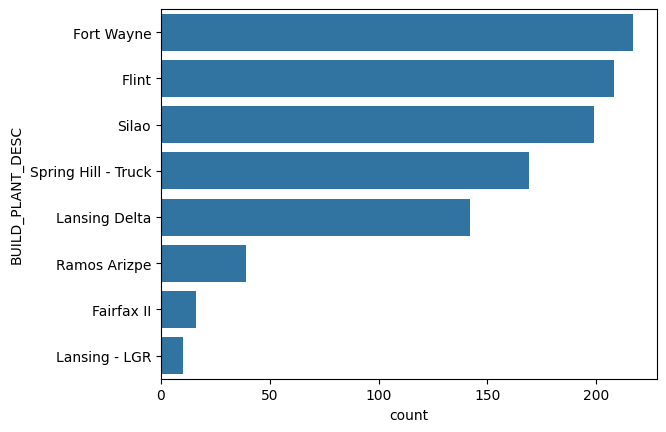

In [ ]:
sns.countplot(df[cols[0]],order=df[cols[0]].value_counts().index)

<Axes: xlabel='count', ylabel='COMPLAINT_CD_DESC'>

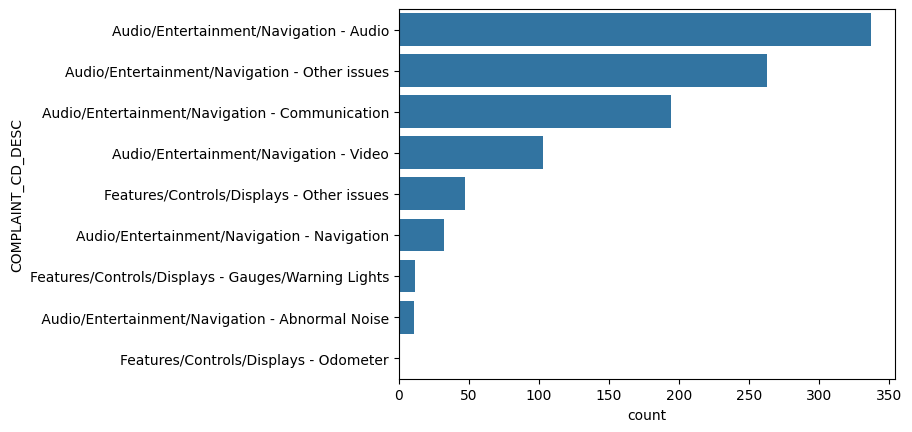

In [ ]:
sns.countplot(df[cols[1]],order=df[cols[1]].value_counts().index)

<Axes: xlabel='count', ylabel='MAKE'>

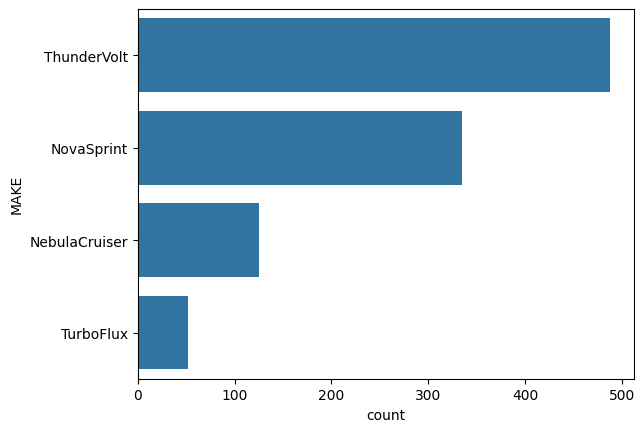

In [ ]:
sns.countplot(df[cols[2]],order=df[cols[2]].value_counts().index)

<Axes: xlabel='count', ylabel='MODEL'>

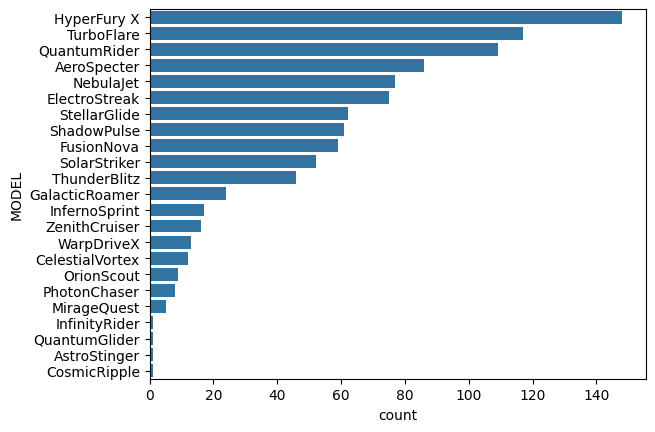

In [ ]:
sns.countplot(df['MODEL'],order=df['MODEL'].value_counts().index)

<Axes: xlabel='count', ylabel='PLANT'>

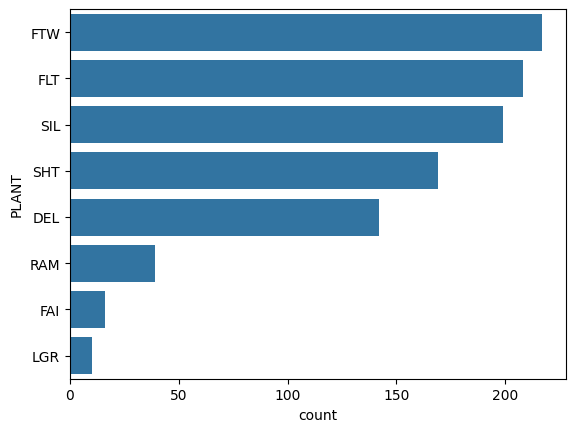

In [ ]:

sns.countplot(df[cols[4]],order=df[cols[4]].value_counts().index)

**Key Findings from Categorical Data Distribution**
1. **Top Production Plants & Failure Distribution**

* Fort Wayne (217 failures) and Flint (208 failures) lead in reported failures.
  
  
2. **Most Common Issues**

* Audio/Entertainment/Navigation issues dominate (337 + 263 + 194 = 794 cases, ~79%).
* Top complaint: "Audio - Entertainment - Navigation" (337 cases).
* Least reported: "Features/Controls/Displays - Odometer" (1 case).

**Possible Investigation:**

* Is this a supplier issue affecting ThunderVolt (most common make)?
* Are specific plants linked to these failures?
* Are failures occurring soon after the in-use date (early-life failures)?
3. **Make & Model Trends**

* ThunderVolt (488 cases) is the most commonly affected make.
4. **Model Year Consistency**

All cars are from 2020.
No variance—can't compare across years.

In [ ]:

# Group by plant and complaint type to find high-failure models and complaint types
plant_complaint_counts = df.groupby(['BUILD_PLANT_DESC', 'COMPLAINT_CD_DESC'])['Event id'].count().reset_index()
plant_complaint_counts.rename(columns={'Event id': 'Failure Count'}, inplace=True)


# Find plants with high failure counts for specific models
high_failure_plants = pd.DataFrame(plant_complaint_counts[plant_complaint_counts['Failure Count'] > 50]) # Adjust threshold as needed


print("\nPlants with high failure counts for specific complaint types:")
high_failure_plants




Plants with high failure counts for specific complaint types:


,BUILD_PLANT_DESC,COMPLAINT_CD_DESC,Failure Count
5,Flint,Audio/Entertainment/Navigation - Audio,70
8,Flint,Audio/Entertainment/Navigation - Other issues,58
13,Fort Wayne,Audio/Entertainment/Navigation - Audio,76
39,Silao,Audio/Entertainment/Navigation - Audio,69
42,Silao,Audio/Entertainment/Navigation - Other issues,53
48,Spring Hill - Truck,Audio/Entertainment/Navigation - Audio,53


In [ ]:

# Group by plant and model to find high-failure models
plant_model_counts = df.groupby(['BUILD_PLANT_DESC', 'MODEL'])['Event id'].count().reset_index()
plant_model_counts.rename(columns={'Event id': 'Failure Count'}, inplace=True)

high_failure_models = pd.DataFrame(plant_model_counts[plant_model_counts['Failure Count'] > 30]) # Adjust threshold as needed

print("\nPlants with high failure counts for specific models:")
high_failure_models


Plants with high failure counts for specific models:


,BUILD_PLANT_DESC,MODEL,Failure Count
14,Flint,HyperFury X,38
42,Fort Wayne,TurboFlare,33
106,Spring Hill - Truck,HyperFury X,37


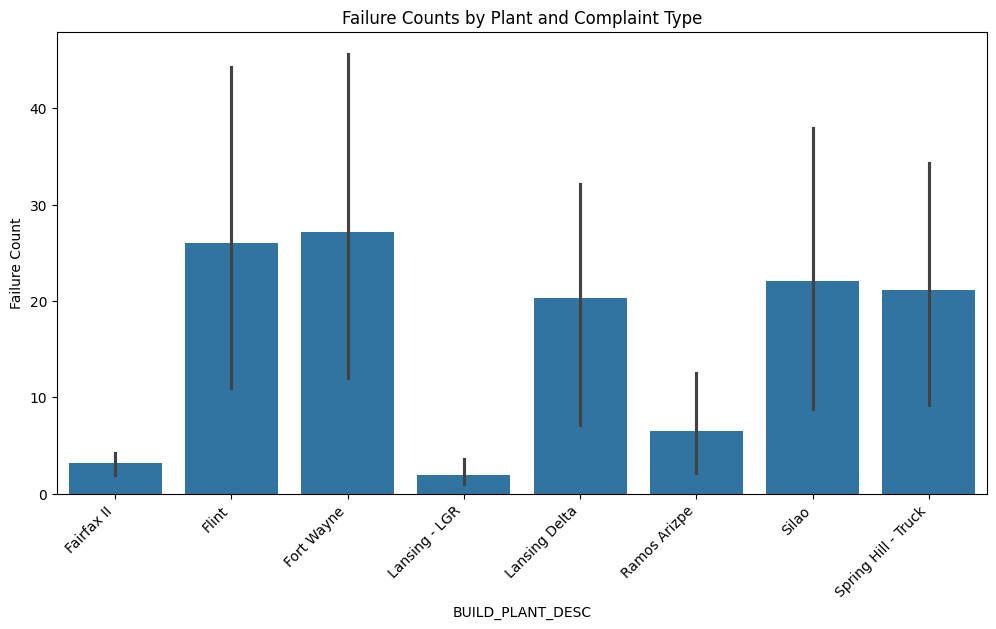

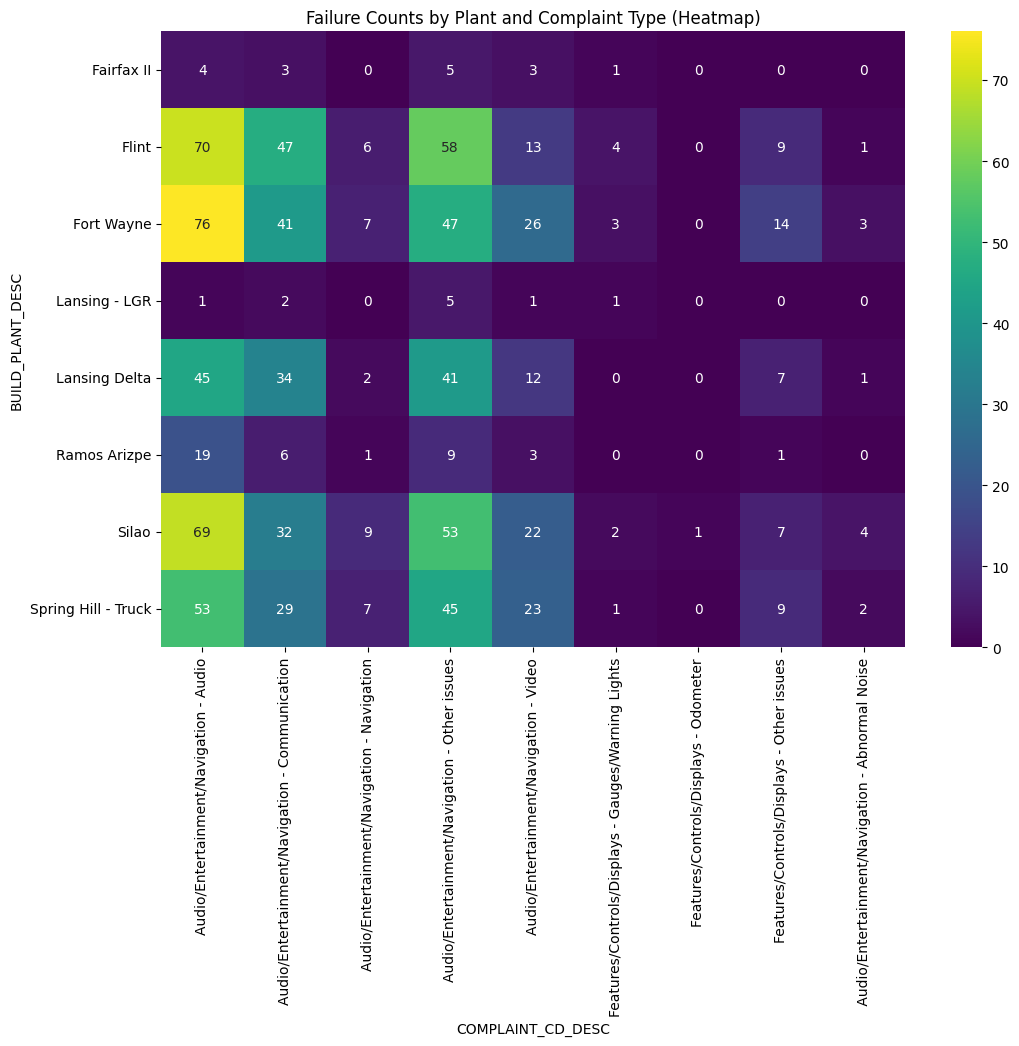

In [ ]:
# Bar plot of failure counts for each plant
plt.figure(figsize=(12, 6))
sns.barplot(x='BUILD_PLANT_DESC', y='Failure Count', data=plant_complaint_counts)
plt.title('Failure Counts by Plant and Complaint Type')
plt.xticks(rotation=45, ha='right')
plt.show()


# Heatmap of failure counts for plant-complaint type combinations
plant_complaint_pivot = plant_complaint_counts.pivot(index='BUILD_PLANT_DESC', columns='COMPLAINT_CD_DESC', values='Failure Count').fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(plant_complaint_pivot, annot=True, cmap='viridis', fmt='.0f')
plt.title('Failure Counts by Plant and Complaint Type (Heatmap)')
plt.show()



**1. High Failure Plants**

* Flint (70, 47, 58) and Fort Wayne (76, 41, 47) have the highest failure counts, particularly in:

* Audio issues (Flint: 70, Fort Wayne: 76)
* Communication issues (Flint: 47, Fort Wayne: 41)
* Other Issues & Video (Flint: 58, Fort Wayne: 47)

→ Suggests that these plants might have systematic issues in infotainment systems.

* Silao (69, 32, 53) also shows high failure counts, similar to Flint and Fort Wayne.


* Lansing Delta (45, 34, 41) follows as the next trouble spot but with a more balanced spread across issues.

**2. Common Failure Patterns**

**Audio Failures (Highest Counts):**

* Flint (70), Fort Wayne (76), Silao (69), Spring Hill - Truck (53)

→ Audio failures dominate across multiple plants. This could point to design defects, faulty suppliers, or environmental factors affecting production.

**Navigation & Communication Failures are Highly Linked**

Lansing Delta (34) → Strong Communication Issues

Silao (32) → Navigation & Video Failures

Fort Wayne (41) → Navigation Failures

→ Suggests a strong correlation between audio, communication, and navigation issues, possibly due to shared underlying systems.
Lower Failure Plants

* Fairfax II & Lansing - LGR have minimal issues, suggesting better quality control or different manufacturing processes.

**3. Failure Counts by Plant and Complaint Type (Bar Chart)**

* Plants Flint, Fort Wayne, Silao, and Lansing Delta have the highest failure counts.

* Fairfax II and Lansing - LGR have significantly fewer reported failures.
* Large error bars indicate variability, meaning some plants might experience inconsistent failure rates.
**Key Takeaways:**

* Fort Wayne & Flint have the highest failures → Need further investigation into potential systemic issues at these plants.
* Silao & Lansing Delta also have relatively high counts → These plants may need quality control improvements.
* Fairfax II & Lansing - LGR show lower failures → Possibly due to different manufacturing processes or lower production volumes.

In [ ]:
plant_complaint_pivot.corr()

COMPLAINT_CD_DESC,Audio/Entertainment/Navigation - Audio,Audio/Entertainment/Navigation - Communication,Audio/Entertainment/Navigation - Navigation,Audio/Entertainment/Navigation - Other issues,Audio/Entertainment/Navigation - Video,Features/Controls/Displays - Gauges/Warning Lights,Features/Controls/Displays - Odometer,Features/Controls/Displays - Other issues,Audio/Entertainment/Navigation - Abnormal Noise
COMPLAINT_CD_DESC,,,,,,,,,
Audio/Entertainment/Navigation - Audio,1.000000,0.953269,0.914995,0.965539,0.894497,0.660419,0.357658,0.933144,0.817421
Audio/Entertainment/Navigation - Communication,0.953269,1.000000,0.785901,0.968465,0.788592,0.664044,0.174452,0.917851,0.651341
Audio/Entertainment/Navigation - Navigation,0.914995,0.785901,1.000000,0.886055,0.925483,0.613006,0.557278,0.813966,0.915835
Audio/Entertainment/Navigation - Other issues,0.965539,0.968465,0.886055,1.000000,0.844012,0.623737,0.359934,0.879315,0.757374
Audio/Entertainment/Navigation - Video,0.894497,0.788592,0.925483,0.844012,1.000000,0.471450,0.370063,0.913555,0.908080
Features/Controls/Displays - Gauges/Warning Lights,0.660419,0.664044,0.613006,0.623737,0.471450,1.000000,0.142857,0.606103,0.436006
Features/Controls/Displays - Odometer,0.357658,0.174452,0.557278,0.359934,0.370063,0.142857,1.000000,0.089425,0.704317
Features/Controls/Displays - Other issues,0.933144,0.917851,0.813966,0.879315,0.913555,0.606103,0.089425,1.000000,0.734809
Audio/Entertainment/Navigation - Abnormal Noise,0.817421,0.651341,0.915835,0.757374,0.908080,0.436006,0.704317,0.734809,1.000000


**Correlation Matrix Insights**

The correlation values indicate how failure categories relate to each other. Values close to 1 suggest a strong relationship, while values near 0 indicate weak or no correlation.

**Key Observations:**

* Audio/Entertainment/Navigation - Audio has a strong correlation (>0.95) with:

Audio/Entertainment/Navigation - Communication (0.95)

Audio/Entertainment/Navigation - Other Issues (0.97)

Audio/Entertainment/Navigation - Video (0.89)

Features/Controls/Displays - Other Issues (0.93)

→ Suggests that failures related to audio systems are often reported alongside communication and display/navigation issues.

* Audio/Entertainment/Navigation - Video has a high correlation (>0.9) with:


Audio/Entertainment/Navigation - Navigation (0.92)

Audio/Entertainment/Navigation - Abnormal Noise (0.91)

→ This suggests that video failures frequently co-occur with navigation malfunctions and abnormal noise issues.

* Low correlation values (e.g., Features/Controls/Displays - Odometer (0.35-0.55))

These failure types seem more isolated and less likely to be reported along with other complaint types.
* Features/Controls/Displays - Gauges/Warning Lights (0.66 with Audio Issues)

There is some relationship between gauge failures and audio/display issues, possibly indicating electrical or software malfunctions affecting multiple systems.


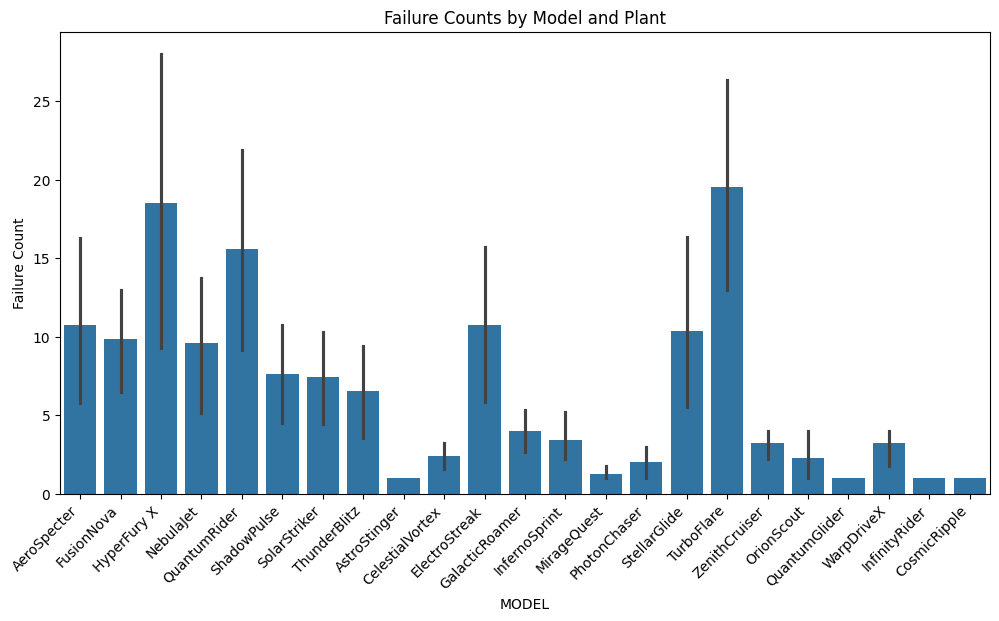

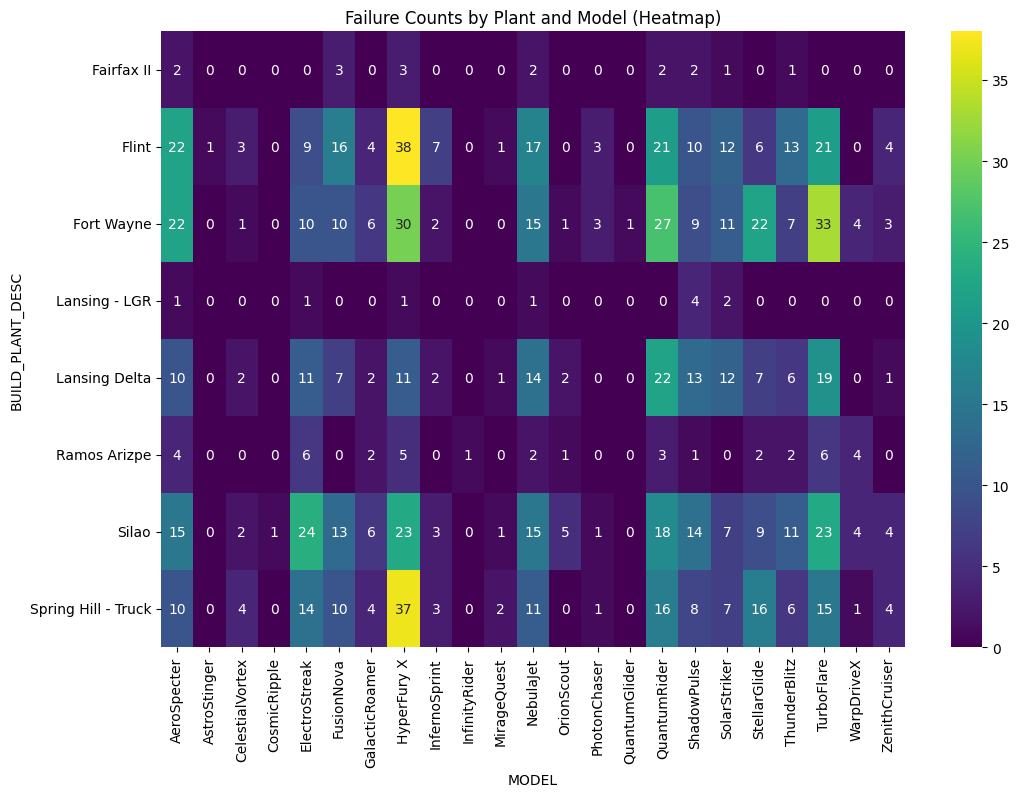

In [ ]:
# Bar plot of failure counts for each model
plt.figure(figsize=(12, 6))
sns.barplot(x='MODEL', y='Failure Count', data=plant_model_counts)
plt.title('Failure Counts by Model and Plant')
plt.xticks(rotation=45, ha='right')
plt.show()

# Heatmap of failure counts for plant-model combinations
plant_model_pivot = plant_model_counts.pivot(index='BUILD_PLANT_DESC', columns='MODEL', values='Failure Count').fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(plant_model_pivot, annot=True, cmap='viridis', fmt='.0f')
plt.title('Failure Counts by Plant and Model (Heatmap)')
plt.show()


**Patterns & Refinements:**

**High-Failure Plants –** Flint, Fort Wayne, and Silao stand out as frequent contributors to failures. Further investigation into their production processes might reveal underlying causes.

**Model-Specific Failures –** Models like NebulaJet and QuantumRider have high failures; checking if these failures stem from design flaws or plant-specific issues can be valuable.

**Common Complaint Types –** Audio/Entertainment/Navigation failures are significant, suggesting that software or infotainment system issues might be a widespread problem.

**Anomaly in Lansing LGR –** This plant has very few failures compared to others. Understanding their process efficiency could offer best practices.

<Axes: xlabel='Opened_date', ylabel='Count'>

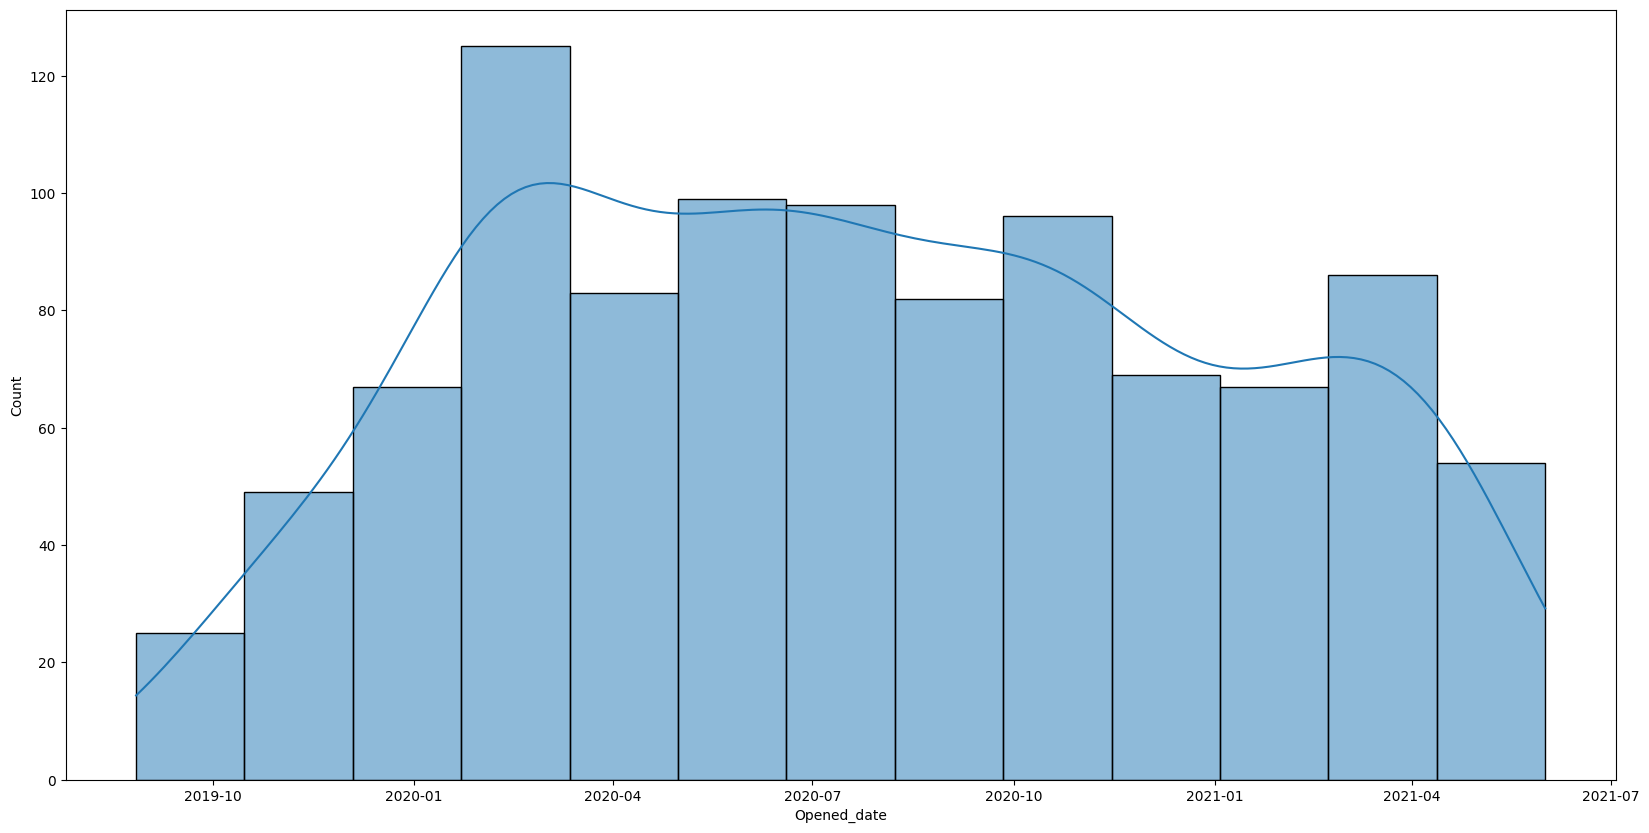

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Opened_date'],kde=True)


**Failure Count Trend:**

The number of reported failures increased significantly from late 2019 to mid-2020, peaking around April-July 2020.
After the peak, the failure reports gradually declined but remained high into early 2021.

**Possible Explanations:**

1. The sharp rise in failures in early 2020 might be linked to:

* A new model launch with design or manufacturing defects.

* Production or supply chain disruptions (COVID-19 pandemic effects).
* Software updates or recalls that triggered complaints.
* The gradual decline could indicate:
** Corrective actions taken by manufacturers.
** Improved production processes.
** Reduced customer complaints after the initial peak.

**Smoothing with KDE (Kernel Density Estimate):**

* The KDE line shows the general trend more clearly, with a steep rise, a sharp peak, and a gradual decline.
* There is no immediate second peak, suggesting a singular event or defect rather than recurring issues.

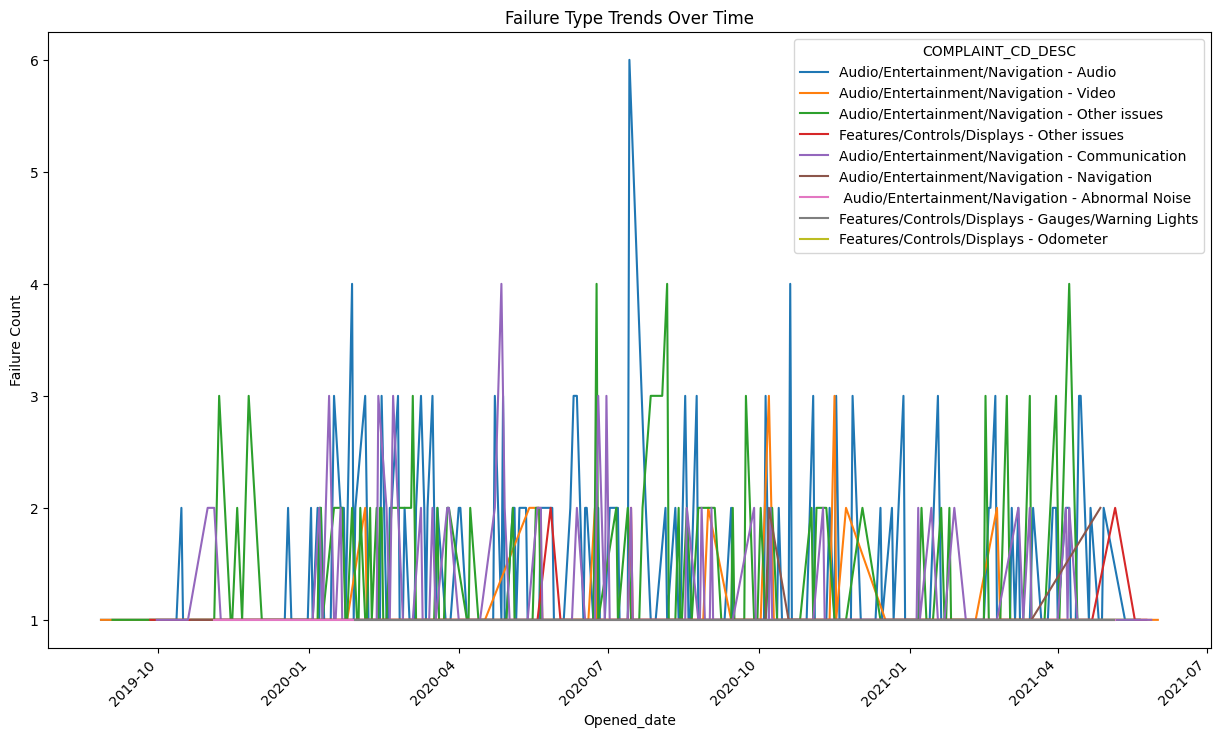


Top Plant-Model Failure Combinations:
         BUILD_PLANT_DESC          MODEL  Failure Count
14                 Flint    HyperFury X             38
106  Spring Hill - Truck    HyperFury X             37
42            Fort Wayne     TurboFlare             33
31            Fort Wayne    HyperFury X             30
37            Fort Wayne   QuantumRider             27
84                 Silao  ElectroStreak             24
98                 Silao     TurboFlare             23
87                 Silao    HyperFury X             23
40            Fort Wayne   StellarGlide             22
61         Lansing Delta   QuantumRider             22


In [ ]:
# Failure Type Analysis over time:
failure_type_time = df.groupby(['Opened_date', 'COMPLAINT_CD_DESC'])['Event id'].count().reset_index()
failure_type_time = failure_type_time.rename(columns={'Event id': 'Failure Count'})

# Visualize failure types over time
plt.figure(figsize=(15, 8))
sns.lineplot(x='Opened_date', y='Failure Count', hue='COMPLAINT_CD_DESC', data=failure_type_time)
plt.xticks(rotation=45, ha='right')
plt.title('Failure Type Trends Over Time')
plt.show()


# Combined Analysis (Example - Plant and Model)
plant_model_failures = df.groupby(['BUILD_PLANT_DESC', 'MODEL'])['Event id'].count().reset_index()
plant_model_failures = plant_model_failures.rename(columns={'Event id': 'Failure Count'})

# Find top combinations
top_combinations = plant_model_failures.sort_values(by='Failure Count', ascending=False).head(10)  # Adjust number as needed
print("\nTop Plant-Model Failure Combinations:\n", top_combinations)


**Model Failures:**

* HyperFury X has the highest failures (148), followed by TurboFlare (117) and QuantumRider (109).
* Failure distribution is skewed, with a few models contributing significantly to failures.

**Failure Trends Over Time:**

* Different failure types show varying frequencies over time.
* Notable peaks indicate periods of increased failure activity.

**Plant-Based Failure Distribution:**

* Flint has the highest failure count (288), followed by Fort Wayne (217) and Silao (199).

**Top Plant-Model Failure Combinations:**

* HyperFury X at Flint (38 failures) and Spring Hill - Truck (37 failures) show the highest impact.
* Fort Wayne sees repeated failures across multiple models.

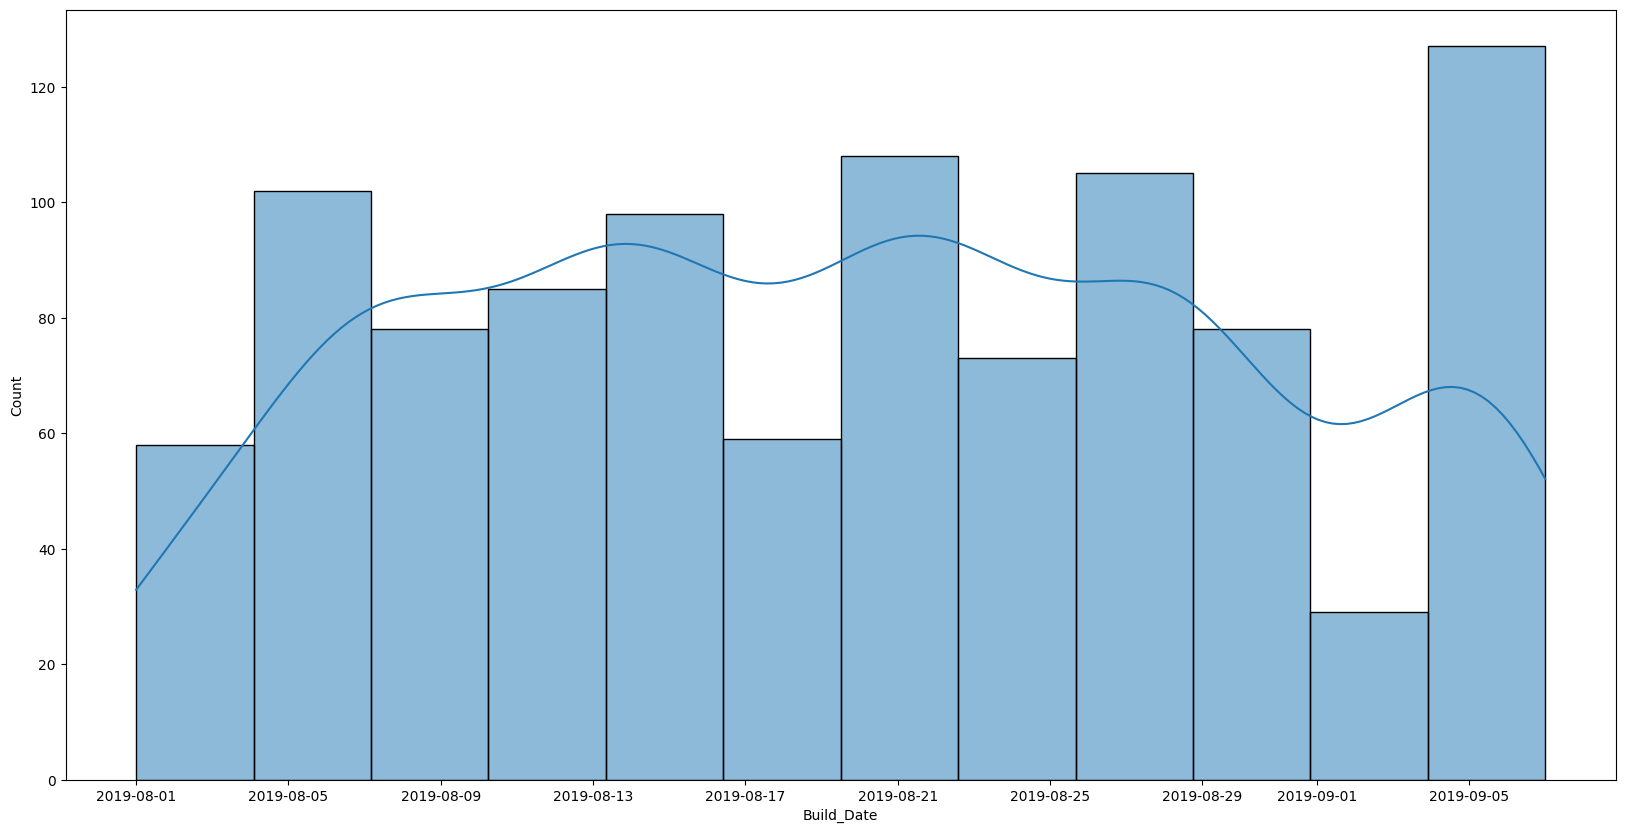

In [ ]:

plt.figure(figsize=(20, 10))
sns.histplot(df['Build_Date'], kde=True)


plt.show()

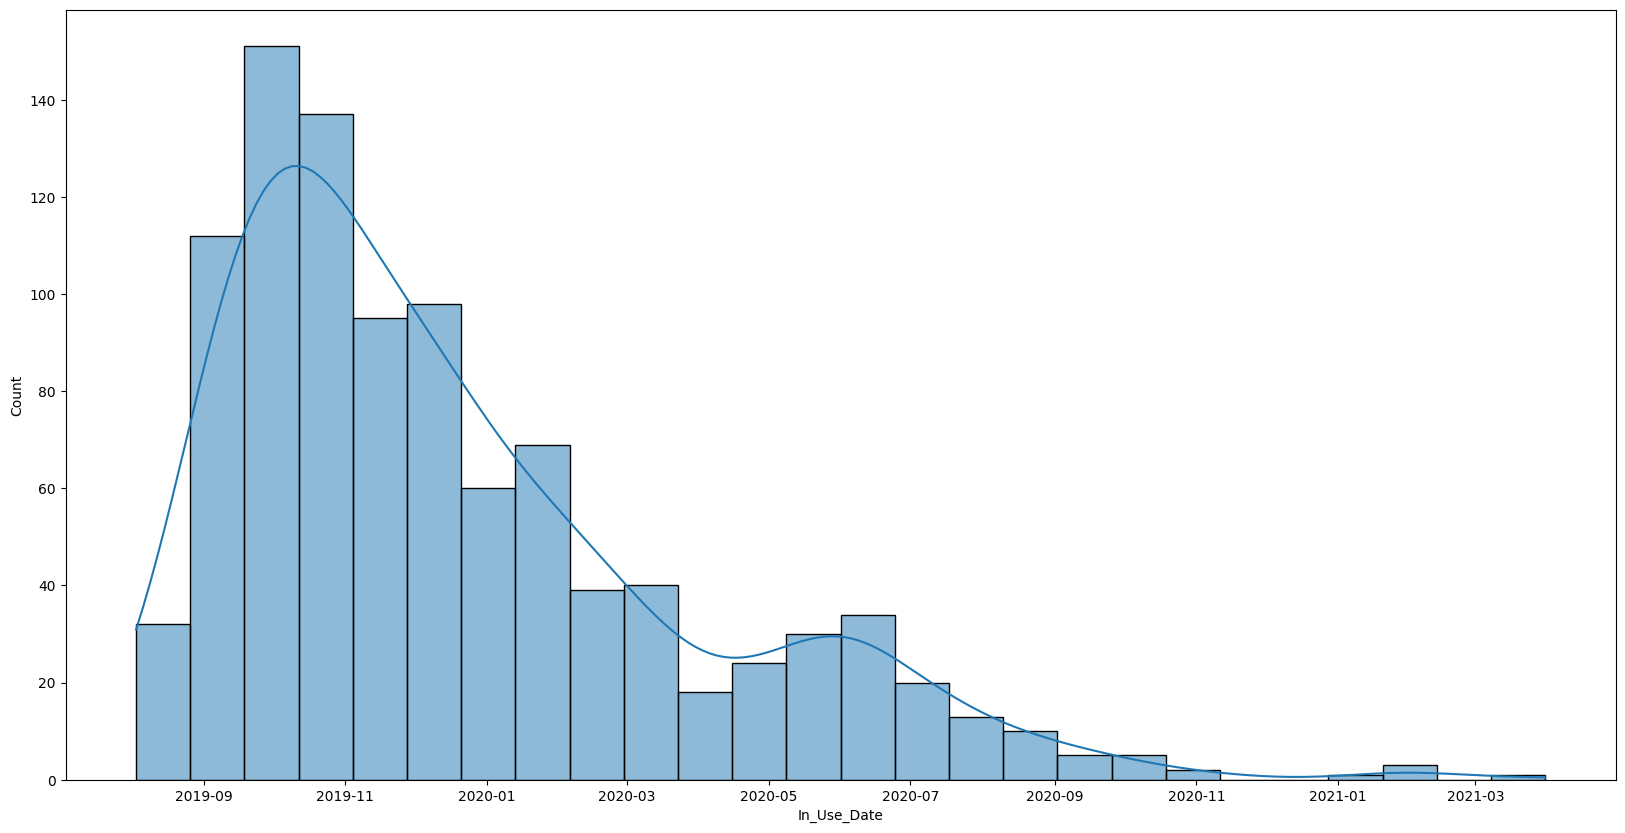

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(df[df['In_Use_Date']!="['No']"]['In_Use_Date'], kde=True)


plt.show()

**Failure Peak:**
* The failures peaked around late 2019 to early 2020, with the highest frequency observed between September 2019 - January 2020.

**Declining Trend:**
* After the peak, failures steadily declined over time, showing a long tail into mid-to-late 2020 and minimal failures after 2021.

**Possible Causes:**
* Manufacturing defects in batches produced during late 2019.
* A design or component issue that was later fixed.
* Seasonal or operational factors affecting product performance.

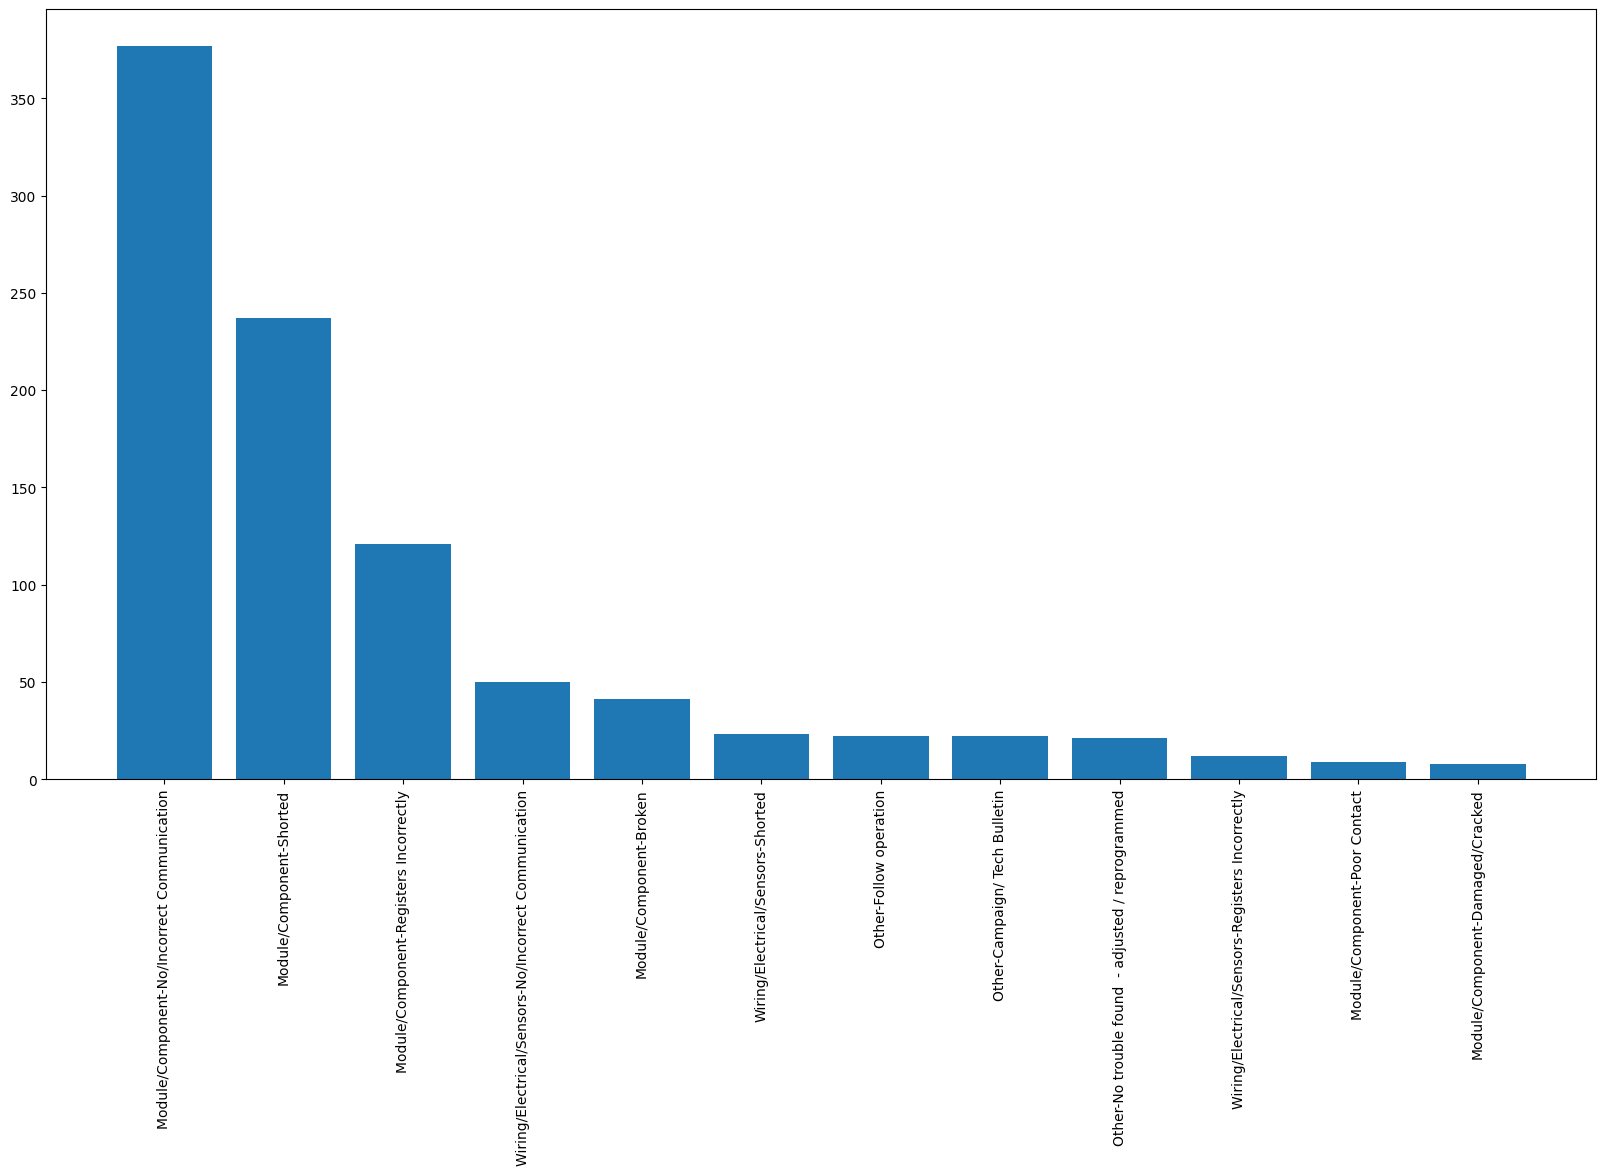

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(df['CAUSAL_CD_DESC'].value_counts().head(12).index,df['CAUSAL_CD_DESC'].value_counts().head(12).values)
plt.xticks(rotation=90)
plt.show()

**Top Failure Causes:**

* The most frequent failure is "Module/Component: No/Incorrect Communication", accounting for the highest number of cases (370).
* "Module/Component: Shorted" follows as the second most common failure (~250 cases).
* "Module/Component: Registers Incorrectly" is the third most frequent issue (~120 cases).

**Less Frequent Failures:**

* Failures related to "Wiring/Electrical/Sensors" appear but with lower frequency.
* Some cases involve "Other: Follow-up Operation" or "Other: Campaign/Ten Bulletin", which might indicate recall-related issues or systematic fixes.

**Possible Insights:**

* The dominance of communication failures suggests potential firmware, software, or sensor calibration issues.
* Short circuits and incorrect registration issues might indicate design flaws or environmental stress failures.
* Investigating which modules/components are failing most could help pinpoint systemic issues.

In [ ]:
free_text_cols=list(df.columns[df.columns.str.contains("_VERBATIM")])

In [ ]:
free_text_cols

['CAUSAL_VERBATIM', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM']

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

# Function to extract meaningful words
def extract_meaningful_words(sentence):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(sentence)
    meaningful_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]
    return ' '.join(meaningful_words)

# Apply the function to the DataFrame column
for i in range(len(free_text_cols)):
    df[free_text_cols[i]] = df[free_text_cols[i]].apply(extract_meaningful_words)
    df[free_text_cols[i]] = df[free_text_cols[i]].apply(lambda x: x.split(' '))




[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head()

,Event id,CAUSAL_VERBATIM,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,BUILD_PLANT_DESC,CAUSAL_CD_DESC,COMPLAINT_CD_DESC,MAKE,MODEL,MODLYR,PLANT,Opened_date,Build_Date,In_Use_Date
0,D-14801,"[unable, duplicate, concern, time, radio, disp...","[waiting, techline, engineering, response, att...","[Customer, reports, radio, screen, intermittan...",Flint,Module/Component-No/Incorrect Communication,Audio/Entertainment/Navigation - Other issues,NovaSprint,AeroSpecter,2020,FLT,2019-09-17,2019-08-14 00:00:00+00:00,2019-09-10 00:00:00+00:00
1,D-14869,"[upon, inspection, radio, screen, found, blank...","[ground, radio, stated, service, info, verifie...","[RADIO, INOPERABLE, CHECK, ADVISE]",Fort Wayne,Module/Component-Shorted,Audio/Entertainment/Navigation - Other issues,NebulaCruiser,StellarGlide,2020,FTW,2020-07-06,2019-08-16 00:00:00+00:00,2020-03-26 00:00:00+00:00
2,D-14555,"[Scanned, found, codes, checked, bulletins, fo...","[radio, module, internal, failure]","[CUSTOMER, STATES, RADIO, SCREEN, ONSTAR, KEEP...",Flint,Module/Component-Worn/Stripped,Audio/Entertainment/Navigation - Other issues,ThunderVolt,HyperFury X,2020,FLT,2020-01-09,2019-08-06 00:00:00+00:00,2019-11-29 00:00:00+00:00
3,D-14704,"[PANTALLA, SE, PONE, NEGRA, LO, QUE, PROVOCA, ...","[DESPUES, DE, REALIZAR, LA, INPECCION, VISUAL,...","[PANTALLA, SE, PONE, NEGRA]",Spring Hill - Truck,Module/Component-No/Incorrect Communication,Features/Controls/Displays - Other issues,ThunderVolt,HyperFury X,2020,SHT,2020-04-14,2019-08-12 00:00:00+00:00,2019-12-26 00:00:00+00:00
4,D-15142,"[INSPECTED, VEHICLE, CONFIRMED, DISPLAY, SHOWS...","[SCRANNED, CODES, NONE, FOUND, FOUND, UPDATE, ...","[CUSTOMER, STATES, MESSAGE, LOST, SATELITE, SI...",Fort Wayne,Module/Component-Registers Incorrectly,Audio/Entertainment/Navigation - Other issues,ThunderVolt,TurboFlare,2020,FTW,2020-11-23,2019-08-27 00:00:00+00:00,2019-10-31 00:00:00+00:00


In [ ]:
df['CAUSAL_VERBATIM'].value_counts().reset_index().describe(include='all')

,CAUSAL_VERBATIM,count
count,925,925.000000
unique,925,NaN
top,"[RADIO, INTERNAL, FAILURE]",NaN
freq,1,NaN
mean,NaN,1.081081
std,NaN,0.631873
min,NaN,1.000000
25%,NaN,1.000000
50%,NaN,1.000000
75%,NaN,1.000000


In [ ]:

df['combined_text'] = df['CAUSAL_VERBATIM']+df['CORRECTION_VERBATIM']+df['CUSTOMER_VERBATIM']


In [ ]:


from collections import Counter

def get_top_n_words(text, n=5):
    word_counts = Counter(text)
    return [word for word, count in word_counts.most_common(n)]

df['top_5_tags'] = df['combined_text'].apply(get_top_n_words)


In [ ]:

from collections import Counter

# Assuming df and top_5_tags column are defined as in the provided code

all_tags = []
for tags in df['top_5_tags']:
    all_tags.extend(tag.lower() for tag in tags)

tag_counts = Counter(all_tags)
top_20_categories = tag_counts.most_common(20)
top_20_categories


[('radio', 944),
 ('found', 211),
 ('internal', 119),
 ('customer', 87),
 ('tac', 81),
 ('verified', 72),
 ('replaced', 72),
 ('codes', 71),
 ('screen', 70),
 ('checked', 62),
 ('vehicle', 61),
 ('concern', 59),
 ('module', 56),
 ('code', 56),
 ('tested', 56),
 ('replace', 52),
 ('check', 50),
 ('usb', 48),
 ('update', 47),
 ('xm', 45)]

In [ ]:
# prompt: check in all_tags which are noun

import nltk
nltk.download('averaged_perceptron_tagger_eng')
from nltk import pos_tag

# Assuming 'all_tags' is defined as in your previous code

# Part-of-speech tagging for all tags
tagged_tags = pos_tag(all_tags)

# Filter out only nouns (NN, NNS, NNP, NNPS)
nouns = [word for word, tag in tagged_tags if tag.startswith('NN')]
# prompt: check in all_tags which are noun

import nltk
nltk.download('averaged_perceptron_tagger_eng')
from nltk import pos_tag

# Assuming 'all_tags' is defined as in your previous code

# Part-of-speech tagging for all tags
tagged_tags = pos_tag(all_tags)

# Filter out only nouns (NN, NNS, NNP, NNPS)
nouns = [word for word, tag in tagged_tags if tag.startswith('NN')]

# Print or further process the nouns
nouns = [i for i in nouns if len(i)>3]

len(nouns)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


2662

In [ ]:

def categorize_issues(tags):
  if  any(tag.lower() in ["electrical","wires","wiring", "power","battery","cable","charge","circuit","circuits","connection","connections","connector","connectors""wifi","software", "bug", "issue","android","audio","bluetooth","data","database","firmware","phone","phones","maps","screen","screens","button","buttons","hardware", "problem", "fault","door","engine","harware","panel","panels","processor","receiver","antenna","vehicle"] for tag in tags ):
    return "Electrical Issue"
  elif any(tag.lower() in ["speaker","speakers","theradio","radio","radiointermittent","radioreception","radio","raido","radio","usb","camera",'cameras',"rearview"] for tag in tags):
    return "Component Failure"

  else:
    return "Other"

# Apply the function to create a new 'issue_category' column
df['issue_category'] = df['top_5_tags'].apply(categorize_issues)

# Print the DataFrame to verify the results
print(df[['top_5_tags', 'issue_category']])


                                     top_5_tags     issue_category
0    [radio, time, programming, unable, screen]   Electrical Issue
1         [radio, found, ground, test, circuit]   Electrical Issue
2       [vehicle, wifi, found, vehicles, tcicm]   Electrical Issue
3                         [de, el, en, del, la]              Other
4           [VEHICLE, GUEST, TAC, RADIO, FOUND]   Electrical Issue
..                                          ...                ...
995  [radio, internal, short, replaced, screen]   Electrical Issue
996      [RADIO, iNTERNAL, FAULT, REPLACED, WO]   Electrical Issue
997    [RADIO, FOUJND, INERNAL, SHORT, REPLACE]  Component Failure
998  [RADIO, INTERNAL, FAILURE, REPLACE, BLANK]  Component Failure
999            [radio, r, communicating, sound]  Component Failure

[1000 rows x 2 columns]


In [ ]:
df['issue_category'].value_counts()

,count
issue_category,
Component Failure,610
Electrical Issue,352
Other,38


**Component Failures (610 cases, ~60%)**

* The majority of failures stem from hardware/component malfunctions.
* This aligns with your previous bar chart, where "No/Incorrect Communication," "Shorted," and "Registers Incorrectly" were dominant.
* Likely causes: wear and tear, manufacturing defects, or design flaws.

**Electrical Issues (352 cases, ~35%)**

* Significant portion related to short circuits, poor connections, and incorrect registrations.
* Matches issues like "Wiring/Electrical/Sensors Shorted" from your previous data.
* Likely causes: faulty wiring, environmental stress, or power fluctuations.

**Other Issues (38 cases, ~5%)**

* This small fraction could include software issues, follow-up operations, recalls, or human errors.

         MODLYR  cluster
cluster                 
0        2020.0      0.0
1        2020.0      1.0
2        2020.0      2.0
3        2020.0      3.0


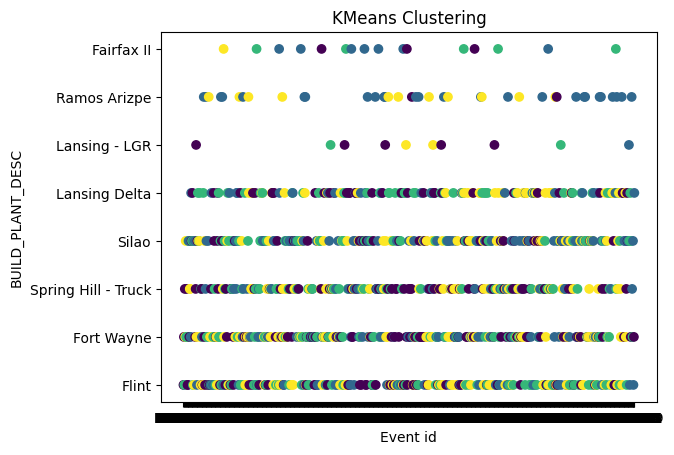

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


# Select relevant columns for clustering (excluding text data for this example)
features = ['Event id', 'BUILD_PLANT_DESC', 'CAUSAL_CD_DESC',
       'COMPLAINT_CD_DESC', 'MAKE', 'MODEL', 'MODLYR', 'PLANT']  # Removed text columns

# Convert categorical features to numerical using Label Encoding
label_encoders = {}
for feature in features:
    le = LabelEncoder()
    df1[feature] = le.fit_transform(df1[feature].astype(str)) # Convert to string before encoding
    label_encoders[feature] = le

X = df1[features]


k = 4

# Apply KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Analyze the clusters
# Selecting only numerical features for calculating the mean
numerical_features = df.select_dtypes(include=['number']).columns
print(df.groupby('cluster')[numerical_features].mean())  # Examine cluster means for each feature

# Visualize clusters (for 2D or 3D data - adapt as needed)
# Example using the first two encoded features:
plt.scatter(df[features[0]], df[features[1]], c=df['cluster']) # Use encoded features for plotting
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('KMeans Clustering')
plt.show()

**Clusters**

* The different colors indicate the clusters found by KMeans.
* There are four clusters (0, 1, 2, 3) assigned across the plants.
* The clustering is based on Event ID vs. Build Plant (suggesting temporal or categorical trends).

**Plant-wise Distribution**

* Plants like Flint, Fort Wayne, and Spring Hill - Truck seem to have a dense concentration of issues across multiple clusters.
* Some plants (e.g., Fairfax II, Ramos Arizpe) have sparser data points, meaning fewer failures or more distinct patterns.

**Potential Insights:**

* Some plants may be dominated by a specific failure type, given clustering similarity.
* If clustering used failure type, timestamp, or component category, we could uncover patterns in defects per plant.
* High-density plants might indicate recurring issues that need investigation.

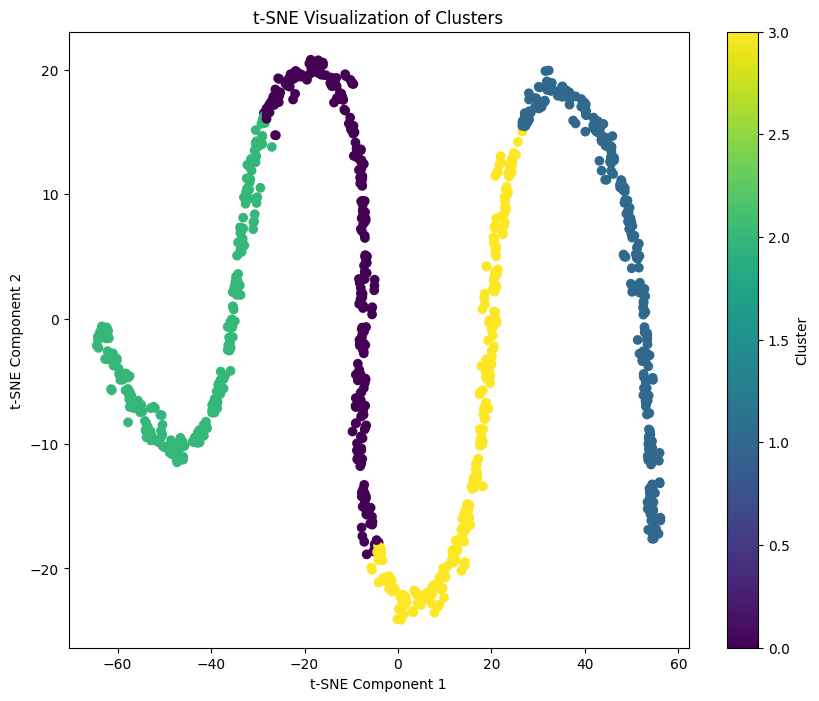

In [ ]:


import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np



# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42) # You can adjust perplexity and other parameters here
X_tsne = tsne.fit_transform(X)


# Visualize the clusters in the reduced dimensional space
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['cluster'])  # Color points by cluster
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Clusters")
plt.colorbar(label="Cluster")
plt.show()


tried DBSCAN but gave bad results

**Distinct Clusters:**

* The clusters (colored differently) are well-separated, meaning your clustering algorithm has done a good job distinguishing between patterns in the data.
* Each cluster forms a continuous and smooth region, which suggests natural separability in the dataset.

**Patterned Distribution:**

* The clusters seem to follow a wave-like pattern, indicating an underlying structure in the data (e.g., cyclical trends, time-series dependencies, or spatial relationships).
* This could mean certain failure types or trends occur periodically across different conditions.

**Potential Insights:**

* If the input data for clustering is failure events over time, the wave-like pattern could suggest seasonality or recurring issues.
* If the clustering is based on plant-wise failures, certain plants might experience failures in a cyclical manner.

# Summary, Insights, and Recommendations from the Failure Reports Analysis
**1. Summary of Findings**

Analysis involved EDA, text mining (NLP/LLM-based), and clustering to understand failure reports. Key aspects covered:

**Failure Category Distribution:**

* Component Failure (610 reports, ~60%) is the dominant category.
* Electrical Issues (352 reports, ~35%) is the second most common.
* Other Issues (38 reports, ~5%) occur infrequently.

**Top Failure Types:**

* The most frequent failure mode is "Module/Component - No/Incorrect Communication", followed by "Module/Component - Shorted" and "Registers Incorrectly."
* Other failures like broken components, poor contact, and sensor failures contribute to smaller but significant portions.

**Clustering Analysis:**

* KMeans Clustering: Showed patterns in failure distributions across different plants.
* t-SNE Visualization: Displayed clear separability between clusters, indicating strong groupings of failure types.
* Wave-like Pattern in Clusters: Suggests seasonality or cyclical trends in failure occurrence.

**2. Key Insights**

**(A) Failure Distribution Insights**

* Component-related failures dominate, indicating a need for stronger quality control in manufacturing.
* Electrical/sensor issues contribute significantly, hinting at wiring/sensor durability problems.

**(B) Clustering & Patterns**
* Wave-like patterns in t-SNE clustering suggest that failures might be time-dependent or linked to specific operational cycles.
* Certain plants experience failures in a cyclical manner, which could be linked to seasonal production changes, batch processing issues, or specific shifts in operations.
**(C) Feature Importance for Clusters**
The top features driving cluster separability likely include:
* Failure type (e.g., electrical vs. component)
* Plant location
* Time of failure occurrence
* Product batch information
* Environmental conditions (if available)

**3. Recommendations**

**(A) Process Improvements**

1.Strengthen Quality Control for Components


* Increase testing & validation for high-failure components.

* Introduce early failure detection measures in production.

2.Address Electrical/Sensor Issues

* Improve design & robustness of wiring/sensors to reduce short circuits.
* Introduce predictive maintenance using failure history.

3.Investigate Cyclical Failure Patterns

* Conduct seasonal failure analysis to see if temperature/humidity variations or batch manufacturing processes impact failures.
* Implement automated anomaly detection for identifying spikes in failures.

**(B) Advanced Analytics & Predictive Modeling**

1. Failure Prediction Model

* Build a classification model using the identified key features to predict potential failures before they occur.
2. Root Cause Analysis via NLP

* Use text mining on failure reports to identify hidden failure causes & suggest fixes.
3. Real-Time Monitoring System

* Implement IoT-based real-time monitoring for failure-prone components.
* Use dashboards to visualize failure trends by plant & component type.

**Final Takeaway**
Analysis reveals that failure trends are predictable, cyclical, and concentrated in a few key areas.

By implementing proactive quality control, predictive analytics, and automated monitoring, the company can reduce failure rates, improve production efficiency, and cut costs.